# **1. IMPORTACIÓN DE LIBRERIAS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. IMPORTACIÓN DE LA DATA**

In [ ]:
redes = pd.read_csv("/content/drive/MyDrive/PYTHON-ANALISIS DE DATOS-DSRP/OSF_socialmedia_data.csv", index_col = 0)
redes= redes.reset_index(drop = True)
redes

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
0,115091,05/02/2017,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
1,115091,05/02/2017,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
2,115091,05/02/2017,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
3,115091,05/02/2017,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
4,115091,05/02/2017,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,9873359,04/25/2017,Tuesday,14:00:09,Daily questions,3,1,1,1,81.0,...,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0,0.0,0.0
12241,9873359,04/25/2017,Tuesday,16:40:58,Daily questions,4,1,1,1,82.0,...,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0,0.0,24.0
12242,9873359,04/25/2017,Tuesday,18:00:06,Daily questions,5,1,1,1,83.0,...,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0,0.0,18.0
12243,9873359,04/25/2017,Tuesday,20:05:31,Daily questions,6,1,1,1,84.0,...,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0,0.0,0.0


In [ ]:
print(f"Hay {redes.shape[0]:,} filas.")
print(f"Hay {redes.shape[1]:,} variables.")
print(f"Hay {redes['Participant'].unique().size} participantes.")

Hay 12,245 filas.
Hay 25 variables.
Hay 125 participantes.


In [ ]:
redes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant                      12245 non-null  int64  
 1   Date                             12245 non-null  object 
 2   Day                              12245 non-null  object 
 3   Time                             12245 non-null  object 
 4   Session.Name                     12245 non-null  object 
 5   Notification.No                  12245 non-null  int64  
 6   LifePak.Download.No              12245 non-null  int64  
 7   Responded                        12245 non-null  int64  
 8   Completed.Session                12245 non-null  int64  
 9   Session.Instance                 8695 non-null   float64
 10  Session.Instance.Response.Lapse  8695 non-null   object 
 11  Reminders.Delivered              12245 non-null  int64  
 12  Instr_DQs         

In [ ]:
# Convertir la columna Date a formato dato.
redes['Date']= pd.to_datetime(redes['Date'])
redes.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active
0,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0
1,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0
2,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0
3,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0
4,115091,2017-05-02,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
redes = redes.rename(columns={'Active':'ASMU'}) # USO ACTIVO DE LAS REDES SOCIALES
redes = redes.rename(columns={'DeprMood':'LowMood'}) # ESTADO DE ÁNIMO BAJO
redes['Participant'] = redes['Participant'].astype('object')

var_totales = list(redes.select_dtypes(include=['object','datetime','float64','int64']).columns)
var_totales.append('DrepRate')
var_totales
df = np.array((-0.025+0.31*redes['Loneliness']+0.25*redes['Inferior']+0.19*redes['Concentrat']+0.15*redes['Stress']+0.06*redes['Fatigue'])).round(2)
rate = pd.DataFrame(df,columns=['DrepRate'])
prueba= redes.copy()
prueba = pd.concat([prueba, rate], axis = 1,ignore_index = True)
prueba.columns=var_totales
prueba.reset_index(drop = True)
prueba
condition = np.where(prueba['DrepRate']>11.58, 'Deprimido', 'No Deprimido')
condition_1 = pd.DataFrame(condition,columns=['IndDep'])
prueba_1= prueba.copy()
prueba_1 = pd.concat([prueba_1, condition_1], axis = 1,ignore_index = True)
var_totales.append('IndDep')
prueba_1.columns=var_totales
prueba_1.reset_index(drop = True)
prueba_1


,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,ASMU,DrepRate,IndDep
0,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,58.16,Deprimido
1,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,51.92,Deprimido
2,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,40.71,Deprimido
3,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,52.62,Deprimido
4,115091,2017-05-02,Tuesday,18:00:00,Daily questions,5,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,9873359,2017-04-25,Tuesday,14:00:09,Daily questions,3,1,1,1,81.0,...,0.0,0.0,0.0,14.0,22.0,0,0.0,0.0,5.64,No Deprimido
12241,9873359,2017-04-25,Tuesday,16:40:58,Daily questions,4,1,1,1,82.0,...,0.0,0.0,0.0,0.0,6.0,0,0.0,24.0,3.38,No Deprimido
12242,9873359,2017-04-25,Tuesday,18:00:06,Daily questions,5,1,1,1,83.0,...,0.0,0.0,0.0,0.0,11.0,0,0.0,18.0,2.12,No Deprimido
12243,9873359,2017-04-25,Tuesday,20:05:31,Daily questions,6,1,1,1,84.0,...,8.0,0.0,0.0,15.0,10.0,0,0.0,0.0,8.88,No Deprimido


In [ ]:
# La variable Responded nos indica con 1 si fue respondido y 0 que no fueron respondidos
prueba_1['Responded'].unique()

array([1, 0])

In [ ]:
# Eliminamos las filas con 0 ya que no fueron respondidas y no podremos analizar los valores de lás demás variables
responde = prueba_1['Responded']==0
filtro = prueba_1.loc[responde].index
redes_df = prueba_1.drop(filtro)
#Formularios respondidos
redes_df


,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,ASMU,DrepRate,IndDep
0,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,58.16,Deprimido
1,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,51.92,Deprimido
2,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,40.71,Deprimido
3,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,52.62,Deprimido
5,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,83.0,15.0,3.0,25.0,16.0,10,0.0,0.0,13.57,Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,9873359,2017-04-25,Tuesday,14:00:09,Daily questions,3,1,1,1,81.0,...,0.0,0.0,0.0,14.0,22.0,0,0.0,0.0,5.64,No Deprimido
12241,9873359,2017-04-25,Tuesday,16:40:58,Daily questions,4,1,1,1,82.0,...,0.0,0.0,0.0,0.0,6.0,0,0.0,24.0,3.38,No Deprimido
12242,9873359,2017-04-25,Tuesday,18:00:06,Daily questions,5,1,1,1,83.0,...,0.0,0.0,0.0,0.0,11.0,0,0.0,18.0,2.12,No Deprimido
12243,9873359,2017-04-25,Tuesday,20:05:31,Daily questions,6,1,1,1,84.0,...,8.0,0.0,0.0,15.0,10.0,0,0.0,0.0,8.88,No Deprimido


# **3. ELIMINAR COLUMNAS INNECESARIAS**

In [ ]:
redes_df1 = redes_df.copy()
redes_df1.drop(columns = ['Date','Time','Instr_DQs','Session.Name','Notification.No','LifePak.Download.No','Responded','Completed.Session','Session.Instance','Session.Instance.Response.Lapse','Reminders.Delivered','AutoPSMU','DrepRate'], axis=1, inplace=True)

# **4. SEPARAR COLUMNAS POR TIPO DE VARIABLE**

In [ ]:
var_categoricas = list(redes_df1.select_dtypes(include=['object']).columns)
var_categoricas.pop(2)
var_categoricas

['Participant', 'Day']

In [ ]:
var_numericas = list(redes_df1.drop('LowMood', axis = 1).select_dtypes(exclude=['object','datetime']).columns)
var_numericas

['Fatigue',
 'Loneliness',
 'Concentrat',
 'LossOfInt',
 'Inferior',
 'Hopeless',
 'Stress',
 'PSMU',
 'News',
 'ASMU']

In [ ]:
target = "IndDep"
target

'IndDep'

# **5. LIMPIEZA DE DATOS**

## 5.1. BÚSQUEDA DE VALORES FALTANTES

In [ ]:
#@title Visualización de los valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])
    
  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)
  
  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(15,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)
  
  

  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
       Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0    Concentrat            8645           50    0.575
1          ASMU            8645           50    0.575
2    Loneliness            8646           49    0.564
3     LossOfInt            8646           49    0.564
4      Inferior            8646           49    0.564
5          PSMU            8646           49    0.564
6          News            8647           48    0.552
7       LowMood            8648           47    0.541
8        Stress            8649           46    0.529
9      Hopeless            8650           45    0.518
10      Fatigue            8653           42    0.483
11  Participant            8695            0    0.000
12          Day            8695       

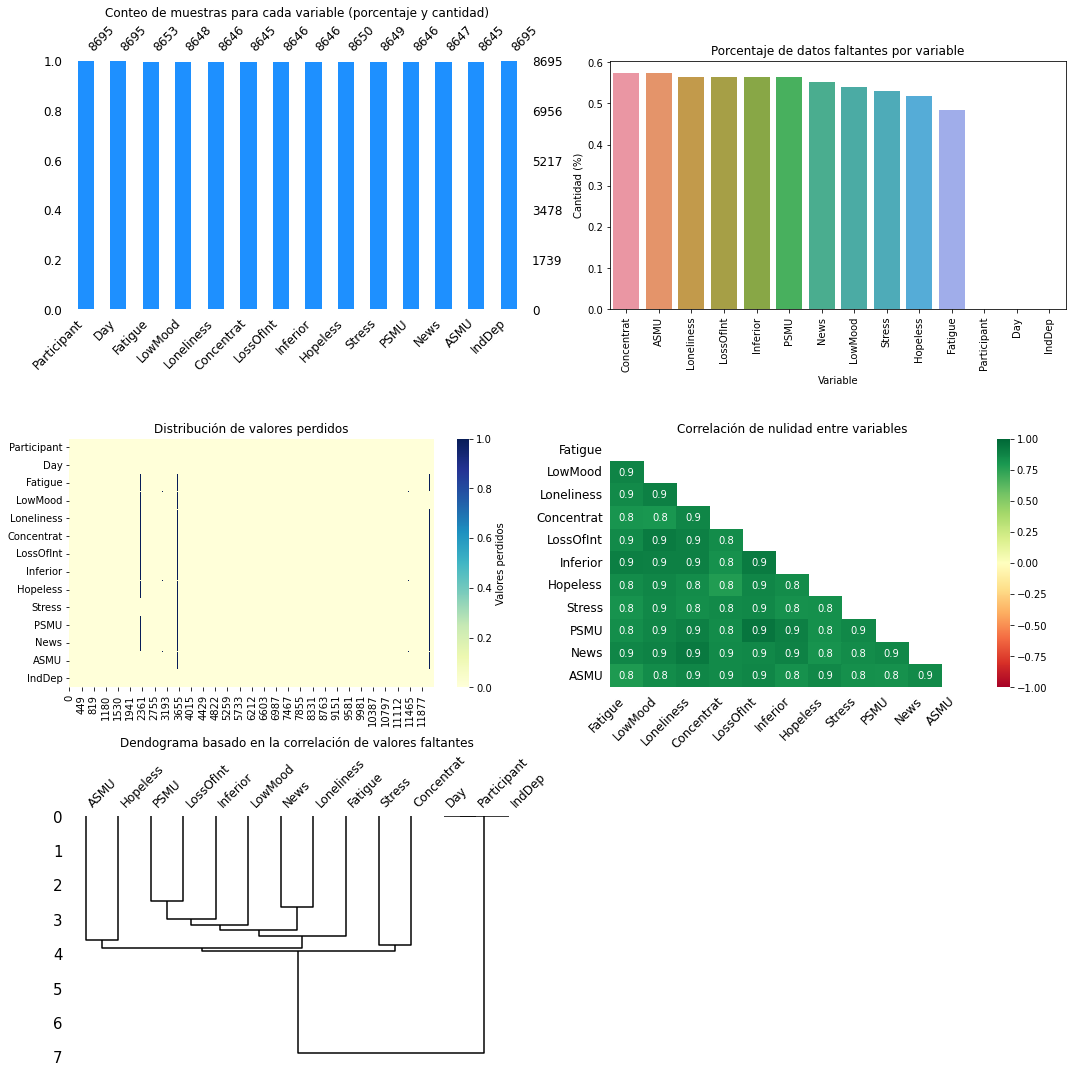

In [ ]:
report_missings(redes_df1)

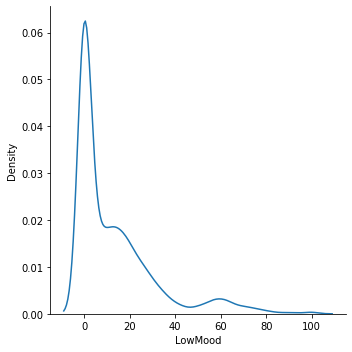

In [ ]:
#DISTRIBUCIÓN DE LOS DATOS
sns.displot(redes_df1['LowMood'], kind="kde")

In [ ]:
# NUestro método de imputación será la eliminación de las filas que tengan los valores NaN, ya que en la mayoría de las variables forman parte del 0.5 % aprox.
redes_df2 = redes_df1.copy()
redes_df3 = redes_df2.dropna()
redes_df3

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,115091,Tuesday,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,Deprimido
1,115091,Tuesday,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,Deprimido
2,115091,Tuesday,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,Deprimido
3,115091,Tuesday,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,Deprimido
5,115091,Tuesday,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,9873359,Tuesday,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,No Deprimido
12241,9873359,Tuesday,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,No Deprimido
12242,9873359,Tuesday,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,No Deprimido
12243,9873359,Tuesday,0.0,0.0,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,No Deprimido


In [ ]:
# Notamos que la cantidad de datos nulos en cero.
data_rep = round(redes_df3.isna().sum().sort_values(ascending=False)/len(redes_df3)*100, 2)
data_rep

Participant    0.0
Day            0.0
Fatigue        0.0
LowMood        0.0
Loneliness     0.0
Concentrat     0.0
LossOfInt      0.0
Inferior       0.0
Hopeless       0.0
Stress         0.0
PSMU           0.0
News           0.0
ASMU           0.0
IndDep         0.0
dtype: float64

****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
       Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0   Participant            8631            0      0.0
1           Day            8631            0      0.0
2       Fatigue            8631            0      0.0
3       LowMood            8631            0      0.0
4    Loneliness            8631            0      0.0
5    Concentrat            8631            0      0.0
6     LossOfInt            8631            0      0.0
7      Inferior            8631            0      0.0
8      Hopeless            8631            0      0.0
9        Stress            8631            0      0.0
10         PSMU            8631            0      0.0
11         News            8631            0      0.0
12         ASMU            8631       

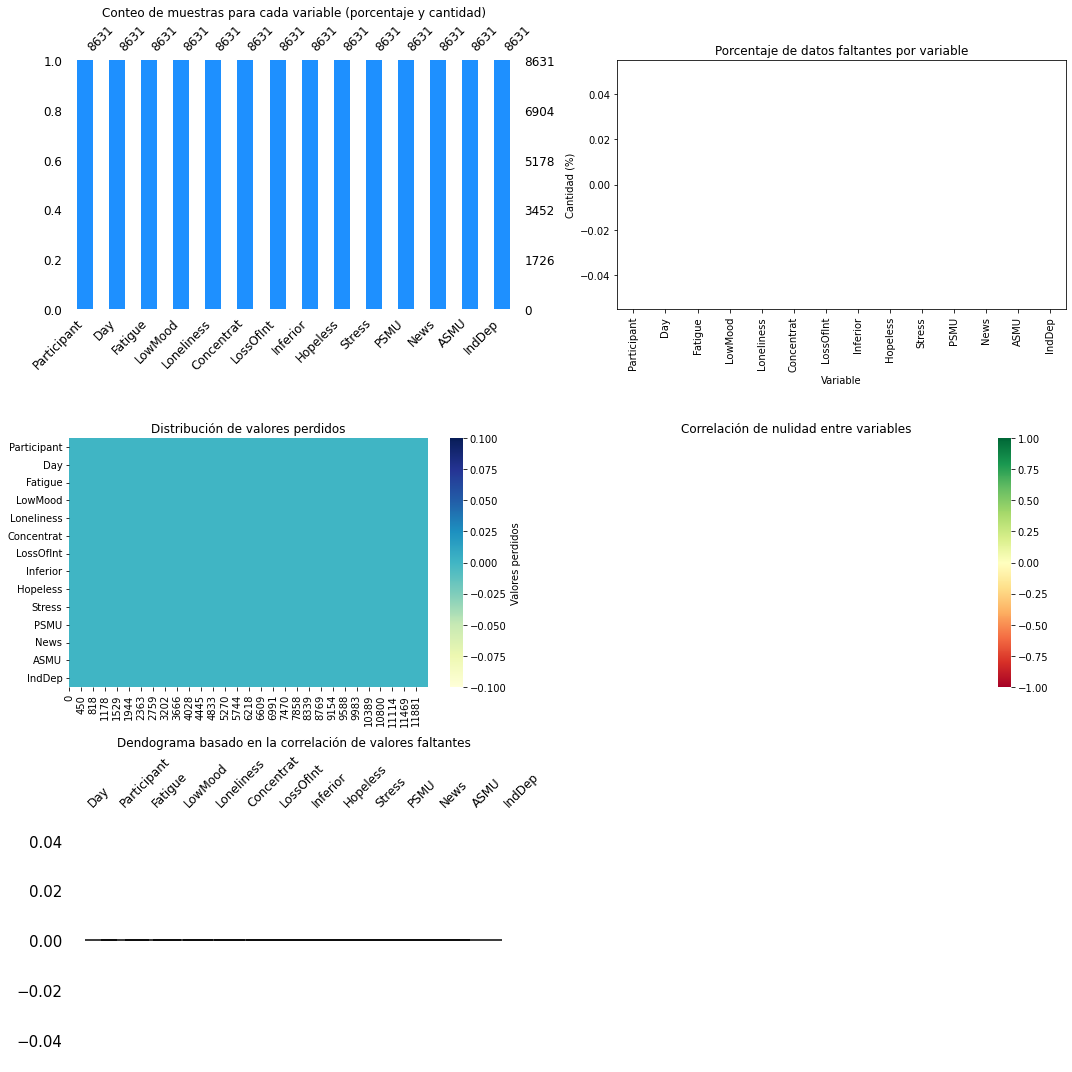

In [ ]:
report_missings(redes_df3)

## 5.2. ELIMNACIÓN DE DUPLICADOS

In [ ]:
# Buscamos si hay duplicados dentro de las filas
redes_unica = redes_df3.duplicated(keep='first')
redes_df3[~redes_unica]

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,115091,Tuesday,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,Deprimido
1,115091,Tuesday,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,Deprimido
2,115091,Tuesday,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,Deprimido
3,115091,Tuesday,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,Deprimido
5,115091,Tuesday,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,9873359,Tuesday,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,No Deprimido
12241,9873359,Tuesday,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,No Deprimido
12242,9873359,Tuesday,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,No Deprimido
12243,9873359,Tuesday,0.0,0.0,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,No Deprimido


In [ ]:
# Eliminamos las filas repetidas y la cantidad se reduce de 8631 a 8460.
redes_df4 = redes_df3.drop_duplicates(keep='first').reset_index(drop=True)
redes_df4

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,115091,Tuesday,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,Deprimido
1,115091,Tuesday,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,Deprimido
2,115091,Tuesday,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,Deprimido
3,115091,Tuesday,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,Deprimido
4,115091,Tuesday,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,9873359,Tuesday,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,No Deprimido
8456,9873359,Tuesday,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,No Deprimido
8457,9873359,Tuesday,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,No Deprimido
8458,9873359,Tuesday,0.0,0.0,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,No Deprimido


## 5.3. ANÁLISIS UNIVARIANTE

### 5.3.1. ANÁLISIS CATEGÓRICO

In [ ]:
var_total = var_categoricas.copy()
var_total.append('IndDep')
var_total

['Participant', 'Day', 'IndDep']

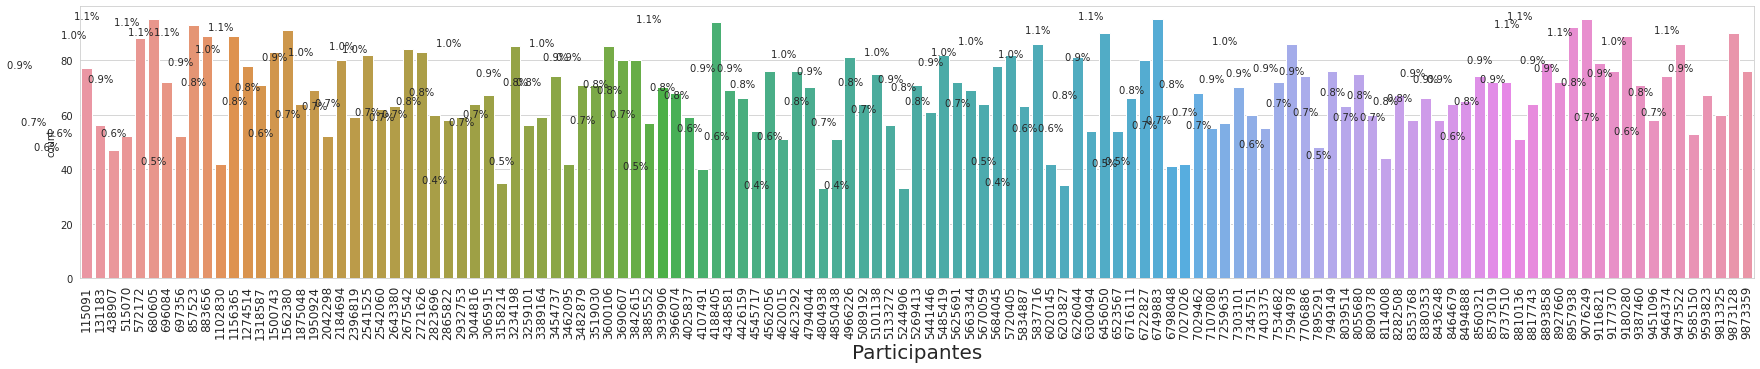

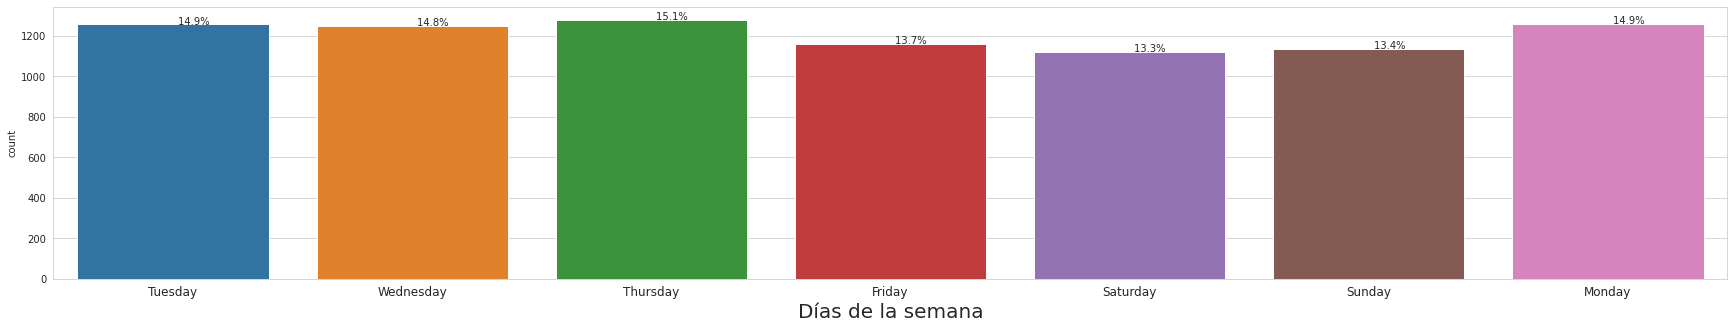

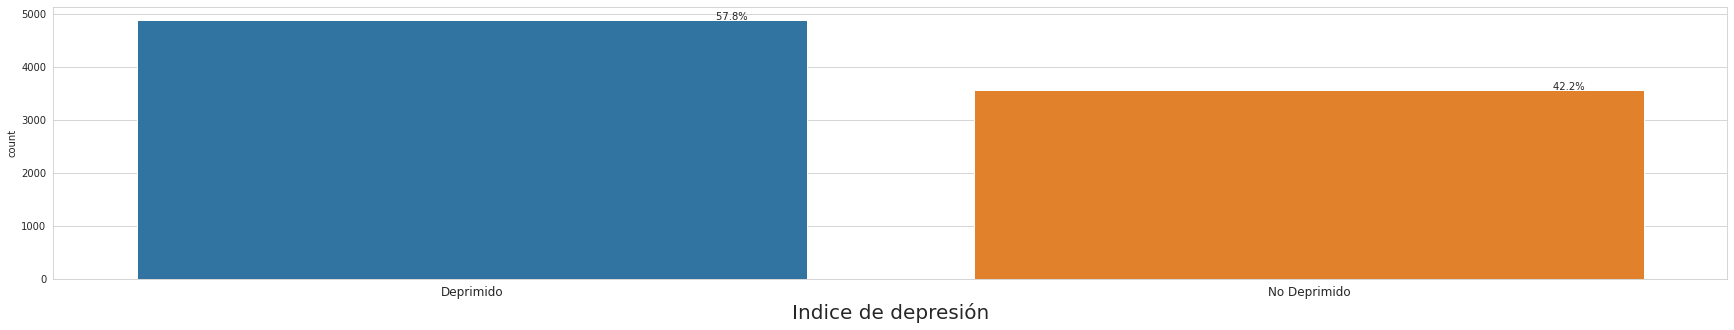

In [ ]:

for var in var_total:
  sns.set_style('whitegrid')
  total = float(len(redes_df4[var_categoricas]))
  plt.figure(figsize=(30,5))
  ax = sns.countplot(x=var, data=redes_df4)
  plt.xticks(size = 12)
  if var == 'Day':
    plt.xlabel('Días de la semana', fontsize=20)
  elif var == target:
    plt.xlabel('Indice de depresión', fontsize=20)
  else:
    plt.xlabel('Participantes', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

  for p in ax.patches:
      percentage="{:.1f}%                   ".format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha="right")
  plt.show()


### 5.3.2. ANÁLISIS NUMÉRICO

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a57439890>,
      dtype=object)

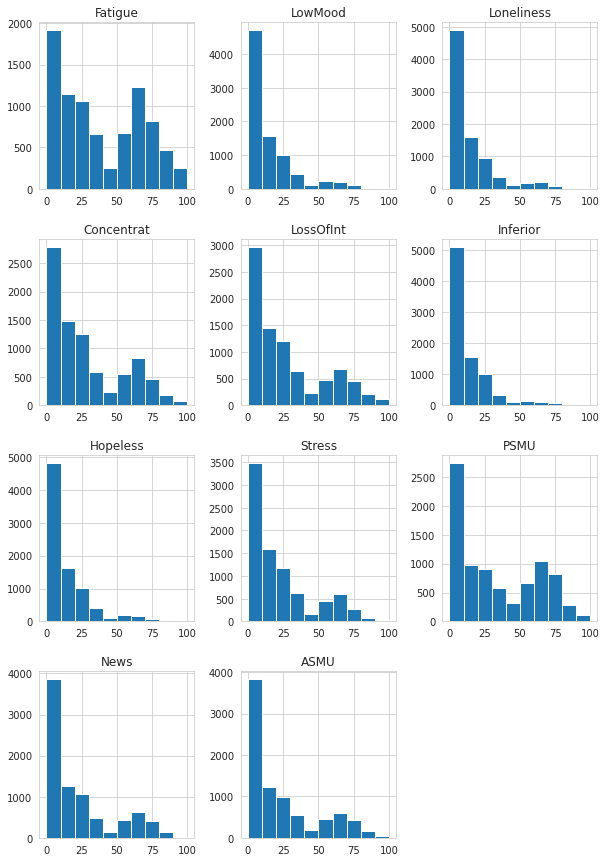

In [ ]:
redes_df4.hist(figsize=(10,15))

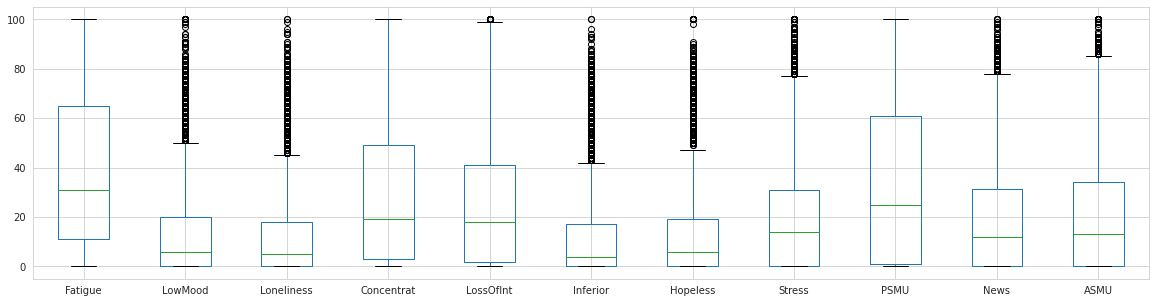

In [ ]:
boxplot = redes_df4.boxplot(figsize=(20,5))

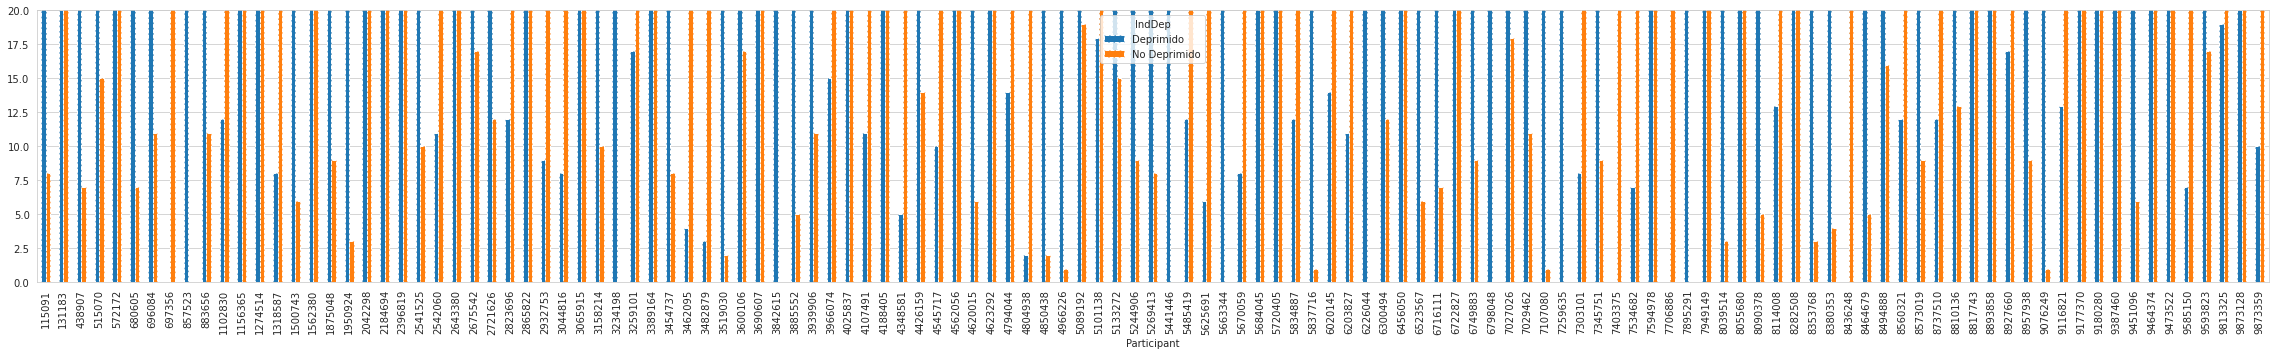

In [ ]:
#@title Variables propias de los participantes - indice de depresion#
dias=pd.concat([redes_df4['IndDep']],axis=1)
fig,(ax)=plt.subplots(ncols=1,figsize=(40,5))
pd.crosstab(redes_df4['Participant'],redes_df4['IndDep']).plot(kind='bar',linestyle='dashed',ax=ax, ylim=[0,20])


In [ ]:
data = pd.crosstab(redes_df4['Participant'],redes_df4['Day'])
data

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Participant,,,,,,,
115091,9,10,12,9,12,12,13
131183,5,10,6,11,10,8,6
438907,5,6,10,8,9,6,3
515070,6,6,7,4,7,13,9
572172,12,13,12,14,12,12,13
...,...,...,...,...,...,...,...
9585150,8,9,7,8,11,5,5
9593823,7,10,6,12,9,11,12
9813325,9,7,8,9,11,10,6


In [ ]:
data = pd.crosstab(redes_df4['Participant'],redes_df4['IndDep'])
data

IndDep,Deprimido,No Deprimido
Participant,,
115091,69,8
131183,20,36
438907,40,7
515070,37,15
572172,66,22
...,...,...
9585150,7,46
9593823,50,17
9813325,19,41


## 5.4. ANÁLISIS MULTIVARIANTE

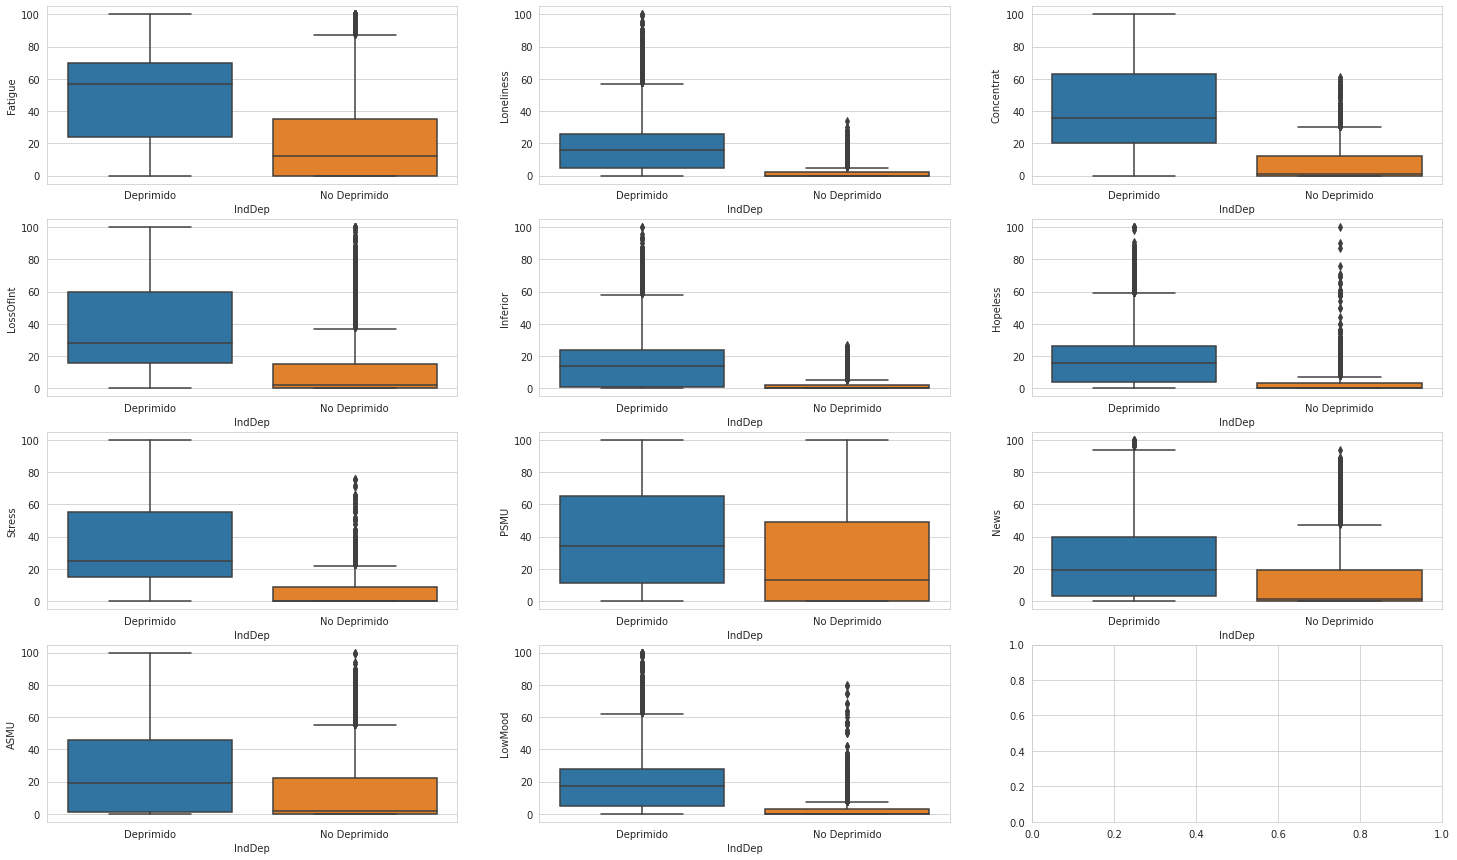

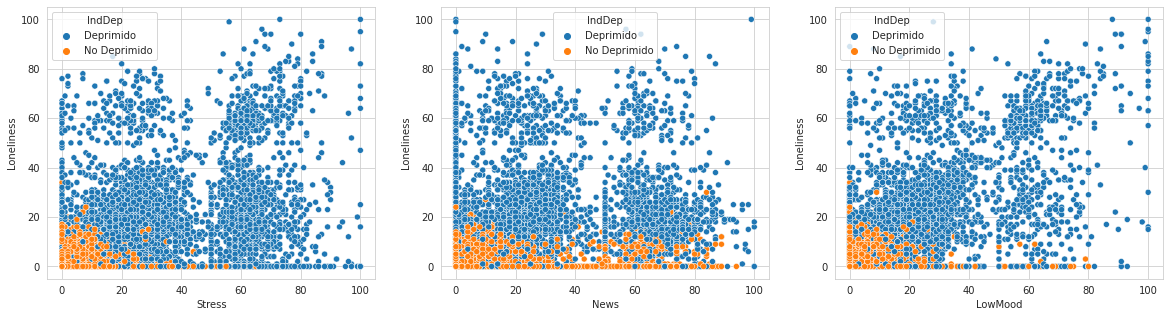

In [ ]:
#@title Respecto a la variable objetivo
f, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,15))

sns.boxplot(x="IndDep", y="Fatigue", data=redes_df4, ax=axes[0,0])
sns.boxplot(x="IndDep", y="Loneliness", data=redes_df4, ax=axes[0,1])
sns.boxplot(x="IndDep", y="Concentrat", data=redes_df4, ax=axes[0,2])
sns.boxplot(x="IndDep", y="LossOfInt", data=redes_df4, ax=axes[1,0])
sns.boxplot(x="IndDep", y="Inferior", data=redes_df4, ax=axes[1,1])
sns.boxplot(x="IndDep", y="Hopeless", data=redes_df4, ax=axes[1,2])
sns.boxplot(x="IndDep", y="Stress", data=redes_df4, ax=axes[2,0])
sns.boxplot(x="IndDep", y="PSMU", data=redes_df4, ax=axes[2,1])
sns.boxplot(x="IndDep", y="News", data=redes_df4, ax=axes[2,2])
sns.boxplot(x="IndDep", y="ASMU", data=redes_df4, ax=axes[3,0])
sns.boxplot(x="IndDep", y="LowMood", data=redes_df4, ax=axes[3,1])

df_frequency=pd.concat([redes_df4['Stress'],redes_df4['News'],redes_df4['Loneliness'],redes_df4['LowMood'],redes_df4['IndDep']],axis=1)
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Loneliness",x="Stress",hue="IndDep",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Loneliness",x="News",hue="IndDep",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Loneliness",x="LowMood",hue="IndDep",ax=ax[2])

### 5.3.1. ELIMINACIÓN DE VALORES ATÍPICOS

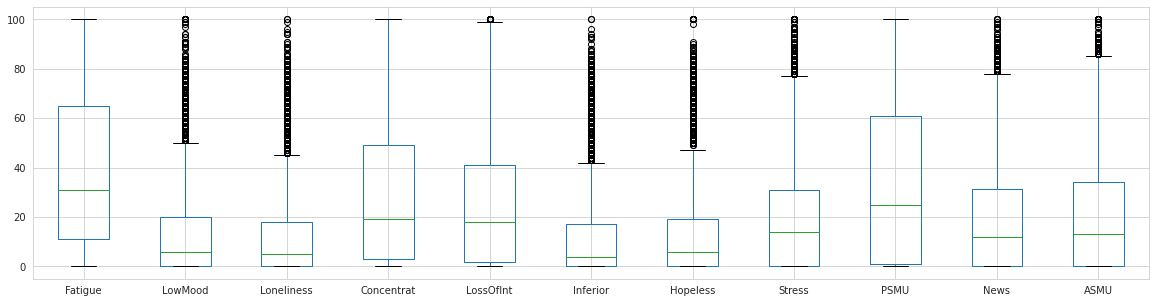

In [ ]:
boxplot = redes_df4.boxplot(figsize=(20,5))

In [ ]:
# Hallando el RIC para todo las variables

for var in redes_df4.drop(columns=var_total).columns.values:
  Q1 = np.percentile(redes_df4[var],25,interpolation = "midpoint")
  Q3 = np.percentile(redes_df4[var],75,interpolation = "midpoint")

  RIC = Q3-Q1

  superior = np.where(redes_df4[var]>= (Q3+1.5*RIC))
  inferior = np.where(redes_df4[var]<= (Q1-1.5*RIC))

  redes_df5 = redes_df4.drop(superior[0])
  redes_df5 = redes_df5.drop(inferior[0])
  

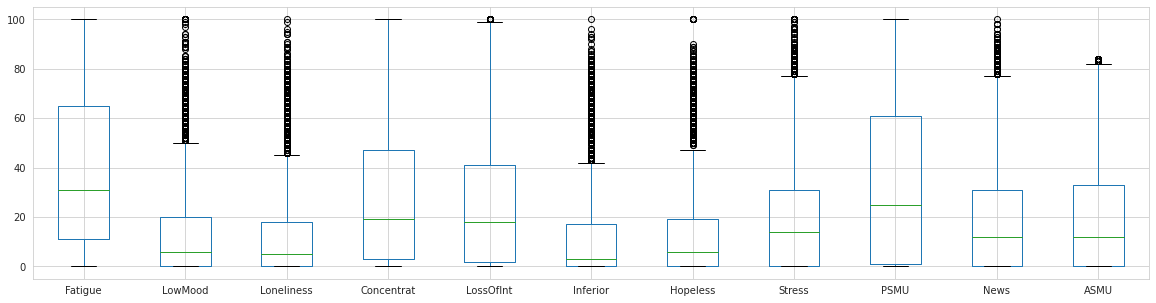

In [ ]:
boxplot = redes_df5.boxplot(figsize=(20,5))

### 5.3.2. MATRIZ DE CORRELACIÓN

In [ ]:
# Correlación de variables numéricas
matriz_crr = redes_df5[var_numericas + ["IndDep"]].copy()
matriz_crr = pd.get_dummies(matriz_crr, columns=["IndDep"], drop_first=False)
matriz_crr.head()

,Fatigue,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep_Deprimido,IndDep_No Deprimido
0,61.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,1,0
1,28.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,1,0
2,24.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,1,0
3,63.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,1,0
4,16.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,1,0


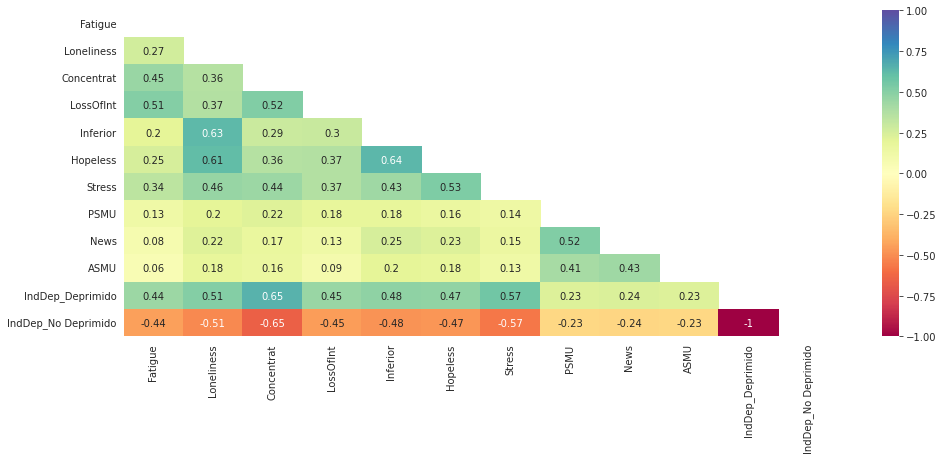

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(matriz_crr.corr(), dtype = np.bool))
sns.heatmap(round(matriz_crr.corr(), 2), mask = mask, cmap = "Spectral", annot = True, vmin = -1, vmax =1 )
plt.show()

In [ ]:
# Correlación de variables categoricas
matriz_cat = redes_df5[var_categoricas + ["IndDep"]].copy()
matriz_cat.head()

,Participant,Day,IndDep
0,115091,Tuesday,Deprimido
1,115091,Tuesday,Deprimido
2,115091,Tuesday,Deprimido
3,115091,Tuesday,Deprimido
4,115091,Tuesday,Deprimido


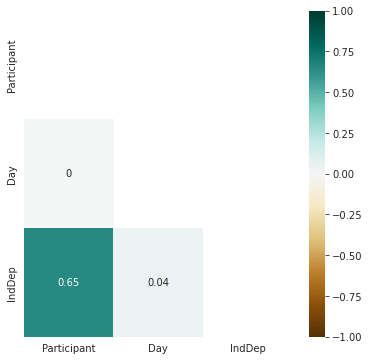

In [ ]:
#@title funciones categoricas
from sklearn import preprocessing
from scipy.stats import chi2_contingency
def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  chi2 = chi2_contingency(crosstab)[0]
  n = np.sum(crosstab)
  phi2 = chi2 / n
  r, k = crosstab.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1) 
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
rows = []
for var1 in matriz_cat.columns:
  col = []
  for var2 in matriz_cat.columns:
    cramer = cramers_V(matriz_cat[var1], matriz_cat[var2])
    col.append(round(cramer, 2))
  rows.append(col)

plt.figure(figsize=(6,6))
rows = np.array(rows)
matr_corr = pd.DataFrame(rows, columns = matriz_cat.columns, index = matriz_cat.columns)
mask = np.triu(np.ones_like(matr_corr, dtype = np.bool))
sns.heatmap(matr_corr, mask = mask, cmap = "BrBG", annot = True, vmin = -1, vmax = 1)
plt.show()

# **6. ANÁLISIS PREDICTIVO**

## 6.1. CODIFICACIÓN DE VARIABLES CATEGÓRICAS

In [ ]:
redes_df5

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,115091,Tuesday,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,Deprimido
1,115091,Tuesday,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,Deprimido
2,115091,Tuesday,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,Deprimido
3,115091,Tuesday,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,Deprimido
4,115091,Tuesday,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,Deprimido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,9873359,Tuesday,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,No Deprimido
8456,9873359,Tuesday,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,No Deprimido
8457,9873359,Tuesday,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,No Deprimido
8458,9873359,Tuesday,0.0,0.0,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,No Deprimido


In [ ]:
redes_df6=redes_df5.copy()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
# Encode labels in column
for i in var_categoricas: 
  redes_df6[i]= encoder.fit_transform(redes_df6[i]) 
redes_df6
# Codificar el target

dic_cat = {
    "No Deprimido":0, 
    "Deprimido":1
    }

redes_df6[target] = redes_df6[target].map(dic_cat)
redes_df6

# redes_df6 = pd.get_dummies(redes_df6, columns=[target], drop_first=False)
# redes_df6

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,0,5,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,1
1,0,5,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,1
2,0,5,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,1
3,0,5,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,1
4,0,5,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,124,5,15.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,22.0,0.0,0.0,0
8456,124,5,22.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,6.0,0.0,24.0,0
8457,124,5,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,0
8458,124,5,0.0,0.0,8.0,22.0,8.0,0.0,0.0,15.0,10.0,0.0,0.0,0


In [ ]:
redes_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8365 entries, 0 to 8459
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Participant  8365 non-null   int64  
 1   Day          8365 non-null   int64  
 2   Fatigue      8365 non-null   float64
 3   LowMood      8365 non-null   float64
 4   Loneliness   8365 non-null   float64
 5   Concentrat   8365 non-null   float64
 6   LossOfInt    8365 non-null   float64
 7   Inferior     8365 non-null   float64
 8   Hopeless     8365 non-null   float64
 9   Stress       8365 non-null   float64
 10  PSMU         8365 non-null   float64
 11  News         8365 non-null   float64
 12  ASMU         8365 non-null   float64
 13  IndDep       8365 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 1.2 MB


## 6.2. ESCALAMIENTO DE VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
redes_df7 = redes_df6.copy()
data_sc = redes_df7.drop([target],axis = 1)
data_nsc = redes_df7[target].reset_index(drop=True)

In [ ]:
#@title seccion de funciones
def scaler_data(data, scaler=0):
  # data: el dataframe a escalar
  # scaler: 0 (default) no aplicar nada
  if scaler==0:
    return data, np.nan    
  if scaler==1:
    sc = StandardScaler()
  else:
    sc = MinMaxScaler()
  data_tr = sc.fit_transform(data)

  return data_tr, sc

In [ ]:
#@title Seleccionar método de escalamiento { run: "auto" }
aplicar_todo = False #@param {type:"boolean"}
dicc_scaler= {"No aplicar":0, "StandardScaler":1, "MinMaxScaler":2}
method_scaler = "StandardScaler" #@param ["No aplicar", "StandardScaler", "MinMaxScaler"]

In [ ]:
print(f"Scaler {method_scaler}:")
redes_sc, sc = scaler_data(data_sc, dicc_scaler[method_scaler])
sc

Scaler StandardScaler:


StandardScaler()

In [ ]:
redes_sc_df=pd.DataFrame(redes_sc,columns=data_sc.columns.values)
redes_sc_df

In [ ]:
redes_sc_df = pd.concat([redes_sc_df, data_nsc], axis = 1, ignore_index = True)
redes_sc_df.columns = redes_df6.columns.values
redes_sc_df

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,IndDep
0,-1.686857,0.970479,0.790645,2.285622,2.874646,1.437039,1.604324,2.547536,2.627811,2.249046,1.175374,0.737190,0.691174,1
1,-1.686857,0.970479,-0.328318,2.504987,2.639217,1.668485,1.222877,1.704674,2.627811,1.989611,-1.103526,0.249561,0.078228,1
2,-1.686857,0.970479,-0.463949,0.366180,1.874071,1.668485,1.566179,0.991483,1.548104,0.778911,1.071788,0.534011,0.609448,1
3,-1.686857,0.970479,0.858461,0.640386,2.580360,2.015654,2.405362,1.250825,0.468397,1.686936,1.209903,0.330833,0.078228,1
4,-1.686857,0.970479,-0.735213,0.475863,-0.715654,0.009790,2.176494,0.278293,-0.551327,0.173562,-0.551066,-0.847603,-0.861622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,1.680396,0.970479,-0.769121,-0.730643,-0.715654,-0.491676,-0.989513,-0.694240,-0.731278,-0.302070,-0.343893,-0.847603,-0.861622,0
8361,1.680396,0.970479,-0.531765,-0.730643,-0.715654,-0.607399,-0.989513,-0.694240,-0.731278,-0.907420,-0.896353,-0.847603,0.119091,0
8362,1.680396,0.970479,-1.142109,-0.730643,-0.715654,-0.645973,-0.989513,-0.694240,-0.731278,-0.907420,-0.723710,-0.847603,-0.126087,0
8363,1.680396,0.970479,-1.277741,-0.730643,-0.244795,-0.183082,-0.684356,-0.694240,-0.731278,-0.258831,-0.758238,-0.847603,-0.861622,0


## 6.3. EXPERIMENTACIÓN

In [ ]:
# División de la data
x=redes_sc_df.drop([target],axis = 1)
y=redes_sc_df[target]

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.80,random_state = 2022)
X_train

,Participant,Day,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
6583,1.028670,0.472500,1.163633,0.146816,3.404363,1.398465,1.337311,3.455233,3.287632,1.773414,-0.758238,0.249561,-0.861622
3746,-0.193317,-0.025479,-1.277741,-0.730643,-0.715654,-1.031716,-0.989513,-0.694240,-0.731278,-0.907420,-0.551066,-0.034889,-0.330402
3098,-0.464870,-0.025479,1.163633,-0.566120,-0.715654,-1.031716,1.909481,-0.694240,-0.311392,-0.820941,-0.136720,-0.522518,-0.861622
4507,0.132546,1.468458,-1.277741,-0.730643,-0.715654,-1.031716,-0.989513,-0.694240,-0.731278,-0.907420,-0.378422,-0.481882,-0.861622
5993,0.757117,-1.021438,-0.633489,-0.401596,-0.009365,1.514188,2.290928,-0.045885,-0.551327,-0.820941,0.381212,0.574647,1.058942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,0.920049,-1.519417,1.129725,-0.182231,-0.303652,1.128445,-0.646211,-0.694240,0.228462,-0.907420,-0.516537,-0.563153,-0.861622
4720,0.214012,-1.021438,-1.243833,-0.730643,-0.715654,-1.031716,-0.989513,-0.694240,-0.731278,-0.345309,0.899144,0.696554,0.772900
173,-1.632546,0.970479,1.061909,0.969433,-0.421367,1.784208,1.718758,0.407964,0.168478,0.000605,1.624249,2.565797,-0.534717
1244,-1.225217,-0.025479,1.061909,0.146816,-0.244795,-0.684547,-0.264765,0.861812,-0.431359,1.989611,-1.103526,0.005747,2.284833


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### 6.3.1. ENTRENAMIENTO SIN BALANCEO

In [ ]:
#@title Algoritmos
def analizar_modelo(X_train, X_test, y_train, y_test, model):
    LABELS= ["No Deprimido","Deprimido"]
    plot_frecuencia(X_train, y_train)
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()   
    print(classification_report(y_test, pred_y))



from collections import Counter
def plot_frecuencia(X, y):
  X= X.values
  y = y.values

  pd.Series(Counter(y)).plot(kind='bar')
  plt.show()
  unique, count = np.unique(y, return_counts=True)
  print ("Distribution de muestras resampling {}".format(Counter(y)))

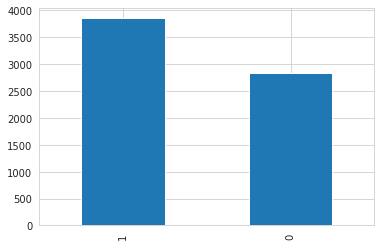

Distribution de muestras resampling Counter({1: 3850, 0: 2842})


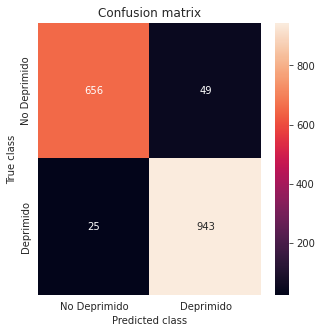

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       705
           1       0.95      0.97      0.96       968

    accuracy                           0.96      1673
   macro avg       0.96      0.95      0.95      1673
weighted avg       0.96      0.96      0.96      1673



In [ ]:
modelo = RandomForestClassifier(n_estimators=100, max_depth = 5, max_leaf_nodes=15)
analizar_modelo(X_train, X_test, y_train, y_test, modelo)

### 6.3.2. ENTRENAMIENTO CON BALANCEO

**RandomUnderSampler**

Muestreo por debajo de las clases mayoritarias

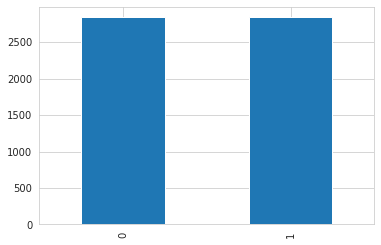

Distribution de muestras resampling Counter({0: 2842, 1: 2842})


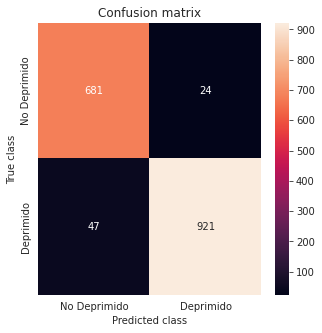

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       705
           1       0.97      0.95      0.96       968

    accuracy                           0.96      1673
   macro avg       0.96      0.96      0.96      1673
weighted avg       0.96      0.96      0.96      1673



In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1234)
X_train_r, y_train_r = cc.fit_resample(X_train, y_train)
analizar_modelo(X_train_r, X_test, y_train_r, y_test, modelo)

**RandomOverSampler**

seleccionar muestras de las clases más pequeñas y aumentarlas.

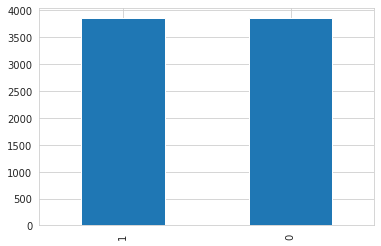

Distribution de muestras resampling Counter({1: 3850, 0: 3850})


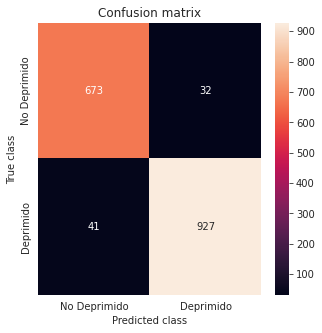

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       705
           1       0.97      0.96      0.96       968

    accuracy                           0.96      1673
   macro avg       0.95      0.96      0.96      1673
weighted avg       0.96      0.96      0.96      1673



In [ ]:
# @title Sobre muestreo ingenuo
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler(random_state = 1234)
X_train_r, y_train_r = ros.fit_resample(X_train, y_train)
analizar_modelo(X_train_r, X_test, y_train_r, y_test, modelo)

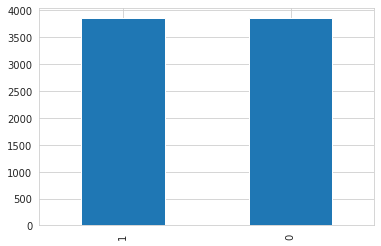

Distribution de muestras resampling Counter({1: 3850, 0: 3850})


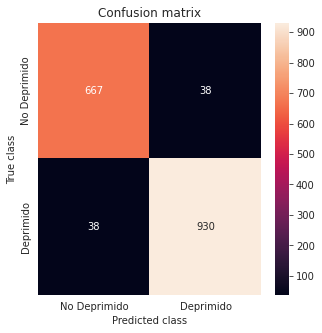

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       705
           1       0.96      0.96      0.96       968

    accuracy                           0.95      1673
   macro avg       0.95      0.95      0.95      1673
weighted avg       0.95      0.95      0.95      1673



In [ ]:
# @title SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_r, y_train_r = sm.fit_resample(X_train, y_train)
analizar_modelo(X_train_r, X_test, y_train_r, y_test, modelo)

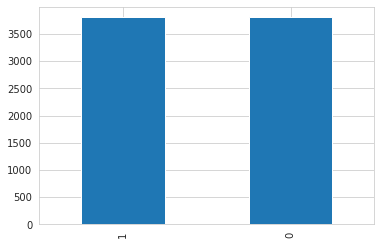

Distribution de muestras resampling Counter({1: 3804, 0: 3804})


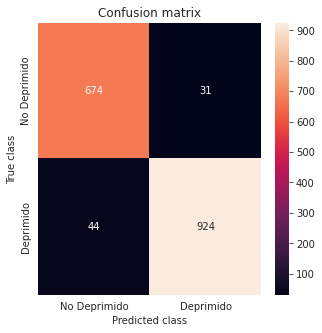

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       705
           1       0.97      0.95      0.96       968

    accuracy                           0.96      1673
   macro avg       0.95      0.96      0.95      1673
weighted avg       0.96      0.96      0.96      1673



In [ ]:
# @title SMOTE+Tomek
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_train_r, y_train_r = smt.fit_resample(X_train, y_train)
analizar_modelo(X_train_r, X_test, y_train_r, y_test, modelo)

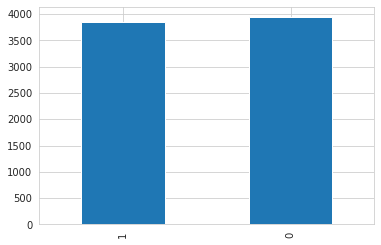

Distribution de muestras resampling Counter({0: 3938, 1: 3850})


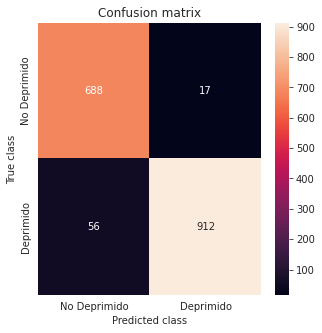

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       705
           1       0.98      0.94      0.96       968

    accuracy                           0.96      1673
   macro avg       0.95      0.96      0.96      1673
weighted avg       0.96      0.96      0.96      1673



In [ ]:
# @title ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train_r, y_train_r = ada.fit_resample(X_train, y_train)
analizar_modelo(X_train_r, X_test, y_train_r, y_test, modelo)